In [1]:
'''
We install the necessary packages required for this Task
''' 
!apt install swig cmake libopenmpi-dev zlib1g-dev
!pip install stable-baselines==2.2.0 box2d box2d-kengz
!apt-get update &&  apt-get install cmake libopenmpi-dev python3-dev zlib1g-dev
!python -m pip install --upgrade pip
!pip install -U setuptools
!apt-get install -y xvfb python-opengl > /dev/null 2>&1
!pip install gym pyvirtualdisplay > /dev/null 2>&1
!pip install gym[atari_py]
!apt install ffmpeg
!which ffmpeg
!pip install stable_baselines


Reading package lists... Done
Building dependency tree       
Reading state information... Done
cmake is already the newest version (3.10.2-1ubuntu2).
zlib1g-dev is already the newest version (1:1.2.11.dfsg-0ubuntu2).
libopenmpi-dev is already the newest version (2.1.1-8).
swig is already the newest version (3.0.12-1).
0 upgraded, 0 newly installed, 0 to remove and 8 not upgraded.
Ign:1 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1710/x86_64  InRelease
Ign:2 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1604/x86_64  InRelease
Hit:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1710/x86_64  Release
Hit:4 http://security.ubuntu.com/ubuntu bionic-security InRelease
Hit:5 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1604/x86_64  Release
Hit:6 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease
Hit:8 http://archive.ubuntu.com/ubuntu bionic InRelease
Hit:9 http://archive.ubuntu.co

In [0]:
'''
This block contains all the necessary imports required for this task
'''
import os
import gym
import numpy as np
import matplotlib.pyplot as plt

from stable_baselines.bench import Monitor
from stable_baselines.results_plotter import load_results, ts2xy
from stable_baselines import DQN
from stable_baselines.deepq.policies import MlpPolicy
from stable_baselines.ddpg.noise import AdaptiveParamNoiseSpec
from stable_baselines.common.vec_env import DummyVecEnv
from stable_baselines.deepq.build_graph import build_act, build_train
import gym
import numpy as np
import matplotlib.pyplot as plt
from IPython import display as ipythondisplay
import random, math, time
import numpy as np
from pyvirtualdisplay import Display

from matplotlib.image import imread
from matplotlib import rc, animation
from IPython import display
from IPython.display import HTML
%matplotlib inline

try:
  from google.colab import files
except:
  print("Could not import Google Colab.")



In [0]:

display = Display(visible=0, size=(400, 300))
display.start()
best_mean_reward, n_steps = -np.inf, 0
plt.rcParams['animation.ffmpeg_path'] = u'/usr/bin/ffmpeg'

In [0]:

"""
Callback called at each step for our DQN algorithm
"""
def callback(_locals, _globals):
  global n_steps, best_mean_reward
  # Print stats for every 1000 calls made
  if (n_steps + 1) % 1000 == 0:
      # Evaluate policy performance
      x, y = ts2xy(load_results(log_dir), 'timesteps')
      if len(x) > 0:
          mean_reward = np.mean(y[-100:])
          print(x[-1], 'timesteps')
          print("Best mean reward: {:.2f} - Last mean reward per episode: {:.2f}".format(best_mean_reward, mean_reward))

          # New best model, you could save the agent here
          if mean_reward > best_mean_reward:
              best_mean_reward = mean_reward
              # Example for saving best model
              print("Saving new best model")
              _locals['self'].save(log_dir + 'best_model.pkl')
  n_steps += 1
  return True

In [0]:
# Create log dir
log_dir = "/tmp/gym/"
os.makedirs(log_dir, exist_ok=True)


In [6]:
'''
The attari environment that was chosen Demon Attack. 
The goal of the game is to maximize the points by killing all the demons while surviving the attack from demons.
'''
env = gym.make('DemonAttack-ram-v0')
'''
Monitor as the name suggests monitors training and logs all in the information in log_dir/monitor.csv
'''
env = Monitor(env, log_dir, allow_early_resets=True)

#VecEnv runs multiple environments sequentially
env = DummyVecEnv([lambda: env])



/usr/local/lib/python3.6/dist-packages/gym/envs/registration.py:14: PkgResourcesDeprecationWarning: Parameters to load are deprecated.  Call .resolve and .require separately.
  result = entry_point.load(False)


In [7]:
'''
Defines the DQN algorithm which we will be using 
'''
model = DQN(MlpPolicy, env, verbose=1)

'''
model.learn returns a trained model in order for us to predict later
total_timesteps->The total number of samples to train on
'''
model.learn(total_timesteps=100000, callback=callback)

2900 timesteps
Best mean reward: -inf - Last mean reward per episode: 100.00
Saving new best model
2900 timesteps
Best mean reward: 100.00 - Last mean reward per episode: 100.00
4292 timesteps
Best mean reward: 100.00 - Last mean reward per episode: 100.00
5587 timesteps
Best mean reward: 100.00 - Last mean reward per episode: 118.75
Saving new best model
6567 timesteps
Best mean reward: 118.75 - Last mean reward per episode: 117.00
7481 timesteps
Best mean reward: 118.75 - Last mean reward per episode: 114.17
8509 timesteps
Best mean reward: 118.75 - Last mean reward per episode: 116.43
9847 timesteps
Best mean reward: 118.75 - Last mean reward per episode: 118.12
9847 timesteps
Best mean reward: 118.75 - Last mean reward per episode: 118.12
11326 timesteps
Best mean reward: 118.75 - Last mean reward per episode: 120.56
Saving new best model
11326 timesteps
Best mean reward: 120.56 - Last mean reward per episode: 120.56
13330 timesteps
Best mean reward: 120.56 - Last mean reward per e

In [0]:
def movingAverage(values, window):
    """
    Smooth values by doing a moving average
    """
    weights = np.repeat(1.0, window) / window
    return np.convolve(values, weights, 'valid')


def plot_results(log_folder, title='Learning Curve'):
    """
    plots the results in using matplotlib
    """
    x, y = ts2xy(load_results(log_folder), 'timesteps')
    y = movingAverage(y, window=50)
    # Truncate x
    x = x[len(x) - len(y):]

    fig = plt.figure(title)
    plt.plot(x, y)
    plt.xlabel('Number of Timesteps')
    plt.ylabel('Rewards')
    plt.title(title + " Smoothed")
    plt.show()


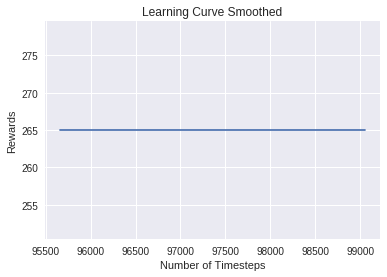

In [9]:
plot_results(log_dir)

In [0]:

'''
This is used to store all the frames which we will be using to save our animation file
'''
frames=[]
'''
Before we proceed we reset the environment to bring it to initial state
'''
obs = env.reset()
for i in range(1000):
    '''
    model.predict-> It gets the model’s action from an observation
    '''
    action, _states = model.predict(obs)
    '''
    Step function makes a step from the current state to next.
    The step function returns 4 values namely observation,reward,done and info
    
    observation -> Represents agent's observation of the environment
    reward -> amount of reward achieved by the previous action
    done -> If the game is over
    info -> some kind of information which can be used for debugging
    '''
    obs, rewards, dones, info = env.step(action)
    screen = env.render(mode='rgb_array')
    #This appending lets us create an animation later
    frames.append(screen)

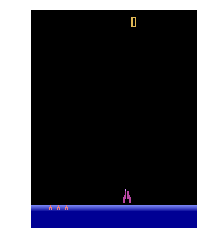

In [11]:
#Combine all frames into an animation 
fig, ax = plt.subplots()
plt.axis('off')
l = ax.imshow(frames[0])

def animate(i):
    l.set_data(frames[i])

Writer = animation.writers['ffmpeg']
writer = Writer(fps=12, metadata=dict(artist='Me'))
ani = animation.FuncAnimation(fig, animate, frames=len(frames))

ani.save('bonus2.mp4', writer=writer, dpi=220)
time.sleep(5) # let it process (only necessary in Colab)

In [0]:
# To Save Animation
files.download('bonus2.mp4')